<a href="https://colab.research.google.com/github/guilhermelaviola/MovieRatingAnalysis/blob/main/IMDbWatchlistStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Importing the dataset and displying the first 10 rows:
df = pd.read_excel('WATCHLIST.xlsx')
df.head(10)

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
0,2020-07-11,Metropolis,movie,8.3,153,1927,"Drama, Sci-Fi",183084,1927-01-10,Fritz Lang
1,2020-07-11,Frankenstein,movie,7.8,70,1931,"Drama, Horror, Sci-Fi, Thriller",78679,1931-11-19,James Whale
2,2021-11-07,Snow White and the Seven Dwarfs,movie,7.6,83,1937,"Animation, Adventure, Family, Fantasy, Musical...",212860,1937-12-21,"William Cottrell, David Hand, Perce Pearce, Be..."
3,2021-09-25,Stagecoach,movie,7.8,96,1939,"Adventure, Drama, Western",52939,1939-02-10,John Ford
4,2022-04-08,Gone with the Wind,movie,8.2,238,1939,"Drama, Romance, War",330391,1939-12-15,"Sam Wood, George Cukor, Victor Fleming"
5,2020-04-29,The Great Dictator,movie,8.4,125,1940,"Comedy, Drama, War",234759,1940-10-15,Charles Chaplin
6,2021-07-16,The Picture of Dorian Gray,movie,7.5,110,1945,"Drama, Fantasy, Horror, Mystery, Romance, Thri...",14229,1945-03-01,Albert Lewin
7,2023-05-31,Spellbound,movie,7.5,111,1945,"Film-Noir, Mystery, Romance, Thriller",51485,1945-10-31,Alfred Hitchcock
8,2022-06-12,SciusciÃ,movie,8.0,87,1946,Drama,8014,1946-04-27,Vittorio De Sica
9,2021-05-21,The Postman Always Rings Twice,movie,7.4,113,1946,"Crime, Drama, Film-Noir, Mystery, Romance, Thr...",22559,1946-04-30,Tay Garnett


In [5]:
# Displaying the number of rows and columns in the dataset:
df.shape

(884, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Created         884 non-null    datetime64[ns]
 1   Title           884 non-null    object        
 2   Title Type      884 non-null    object        
 3   IMDb Rating     884 non-null    float64       
 4   Runtime (mins)  884 non-null    int64         
 5   Year            884 non-null    int64         
 6   Genres          884 non-null    object        
 7   Num Votes       884 non-null    int64         
 8   Release Date    884 non-null    datetime64[ns]
 9   Directors       880 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(4)
memory usage: 69.2+ KB


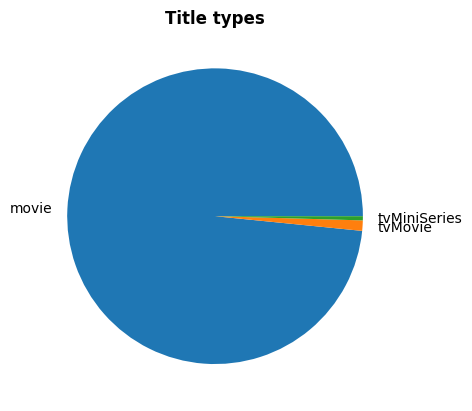

In [17]:
# Displaying the title types present in the dataset:
df['Title Type'].value_counts().plot(kind = 'pie')
plt.ylabel(None)
plt.title('Title types', fontweight = 'bold')
plt.show()

In [18]:
# Creating a datetime object based on the dates from the dataset:
df['Created'] = df['Created'].map(pd.to_datetime)
df['Day Created'] = df['Created'].apply(lambda x : x.day)
df['Month Created'] = df['Created'].apply(lambda x : x.month)
df['Year Created'] = df['Created'].apply(lambda x : x.year)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Created         884 non-null    datetime64[ns]
 1   Title           884 non-null    object        
 2   Title Type      884 non-null    object        
 3   IMDb Rating     884 non-null    float64       
 4   Runtime (mins)  884 non-null    int64         
 5   Year            884 non-null    int64         
 6   Genres          884 non-null    object        
 7   Num Votes       884 non-null    int64         
 8   Release Date    884 non-null    datetime64[ns]
 9   Directors       880 non-null    object        
 10  Day Created     884 non-null    int64         
 11  Month Created   884 non-null    int64         
 12  Year Created    884 non-null    int64         
 13  Quality         884 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(6), object(5)
memo

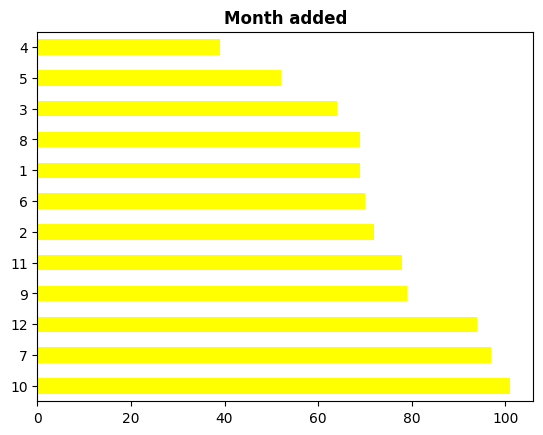

In [19]:
# Displaying distibution of months in which movies were added to the dataset:
df['Month Created'].value_counts().plot(kind = 'barh', color = 'yellow')
plt.ylabel(None)
plt.title('Month added', fontweight = 'bold')
plt.show()

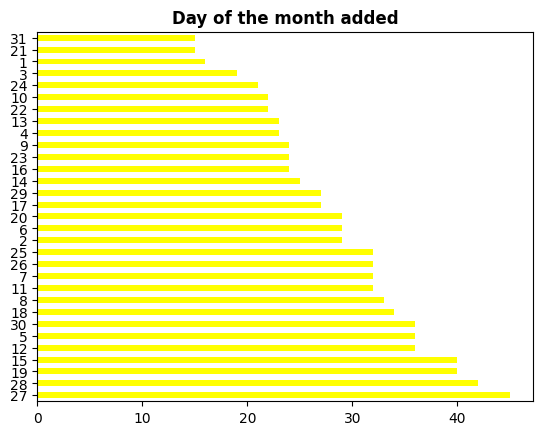

In [26]:
# Displaying distibution of days in which movies were added to the dataset:
df['Day Created'].value_counts().plot(kind = 'barh', color = 'yellow')
plt.ylabel(None)
plt.title('Day of the month added', fontweight = 'bold')
plt.show()

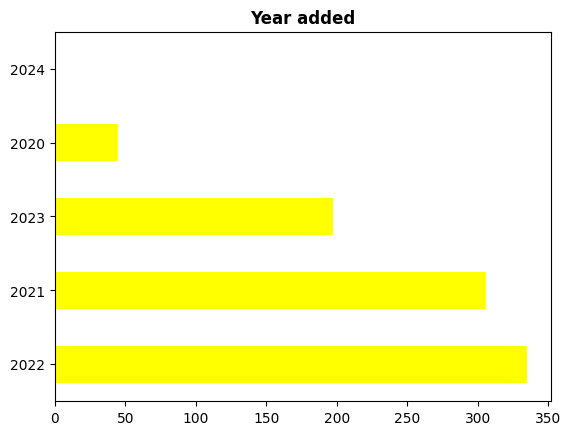

In [28]:
# Displaying distibution of years in which movies were added to the dataset:
df['Year Created'].value_counts().plot(kind = 'barh', color = 'yellow')
plt.ylabel(None)
plt.title('Year added', fontweight = 'bold')
plt.show()

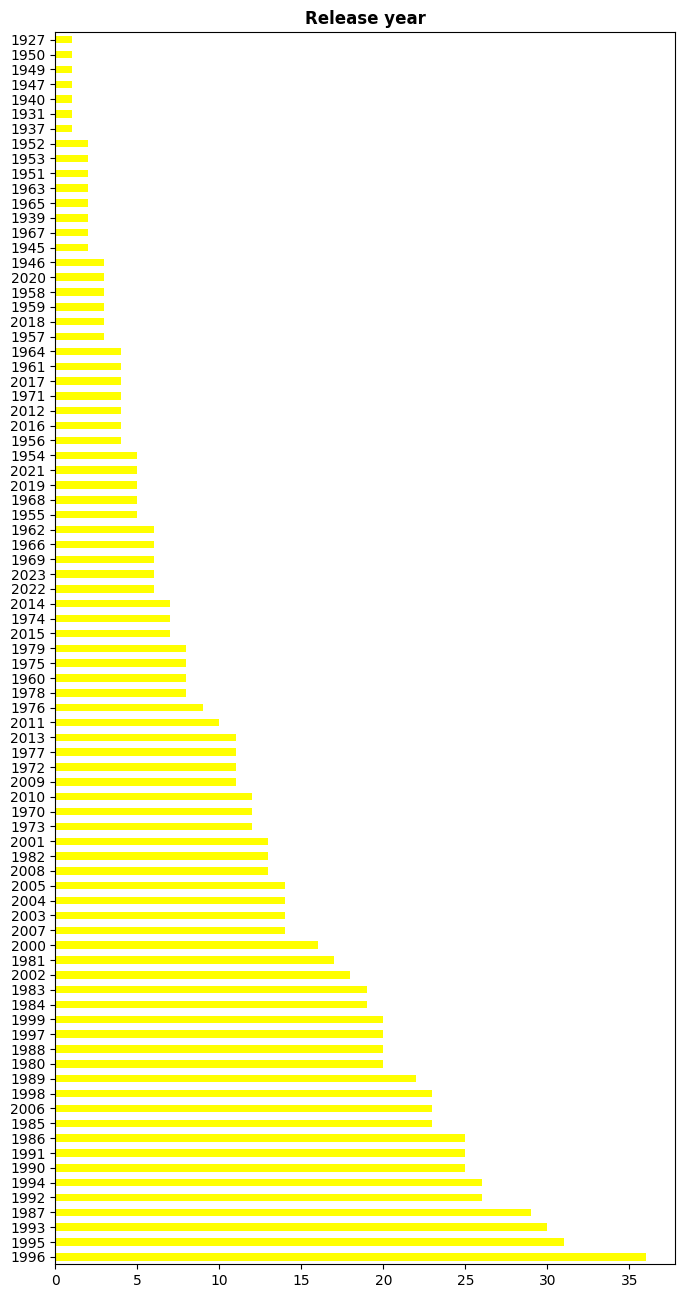

In [30]:
# Displaying distibution of release years in the dataset:
df['Year'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 16))
plt.ylabel(None)
plt.title('Release year', fontweight = 'bold')
plt.show()

In [31]:
# Classifying the movies by quality based on their rating:
def imdb_rating(rating):
  if rating >= 9:
    quality = 'Excellent movie'
  elif rating >= 8 and rating < 9:
    quality = 'Amazing movie'
  elif rating >= 7 and rating < 8:
    quality = 'Good movie'
  elif rating >= 6 and rating < 7:
    quality = 'Okay movie'
  elif rating >= 5 and rating < 6:
    quality = 'Average movie'
  else:
    quality = 'Poor movie'
  return quality

# Applying the function above on a column of the dataset and generating a new column as result:
df['Quality'] = df['IMDb Rating'].apply(imdb_rating)
df.head(10)

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Day Created,Month Created,Year Created,Quality
0,2020-07-11,Metropolis,movie,8.3,153,1927,"Drama, Sci-Fi",183084,1927-01-10,Fritz Lang,11,7,2020,Amazing movie
1,2020-07-11,Frankenstein,movie,7.8,70,1931,"Drama, Horror, Sci-Fi, Thriller",78679,1931-11-19,James Whale,11,7,2020,Good movie
2,2021-11-07,Snow White and the Seven Dwarfs,movie,7.6,83,1937,"Animation, Adventure, Family, Fantasy, Musical...",212860,1937-12-21,"William Cottrell, David Hand, Perce Pearce, Be...",7,11,2021,Good movie
3,2021-09-25,Stagecoach,movie,7.8,96,1939,"Adventure, Drama, Western",52939,1939-02-10,John Ford,25,9,2021,Good movie
4,2022-04-08,Gone with the Wind,movie,8.2,238,1939,"Drama, Romance, War",330391,1939-12-15,"Sam Wood, George Cukor, Victor Fleming",8,4,2022,Amazing movie
5,2020-04-29,The Great Dictator,movie,8.4,125,1940,"Comedy, Drama, War",234759,1940-10-15,Charles Chaplin,29,4,2020,Amazing movie
6,2021-07-16,The Picture of Dorian Gray,movie,7.5,110,1945,"Drama, Fantasy, Horror, Mystery, Romance, Thri...",14229,1945-03-01,Albert Lewin,16,7,2021,Good movie
7,2023-05-31,Spellbound,movie,7.5,111,1945,"Film-Noir, Mystery, Romance, Thriller",51485,1945-10-31,Alfred Hitchcock,31,5,2023,Good movie
8,2022-06-12,SciusciÃ,movie,8.0,87,1946,Drama,8014,1946-04-27,Vittorio De Sica,12,6,2022,Amazing movie
9,2021-05-21,The Postman Always Rings Twice,movie,7.4,113,1946,"Crime, Drama, Film-Noir, Mystery, Romance, Thr...",22559,1946-04-30,Tay Garnett,21,5,2021,Good movie


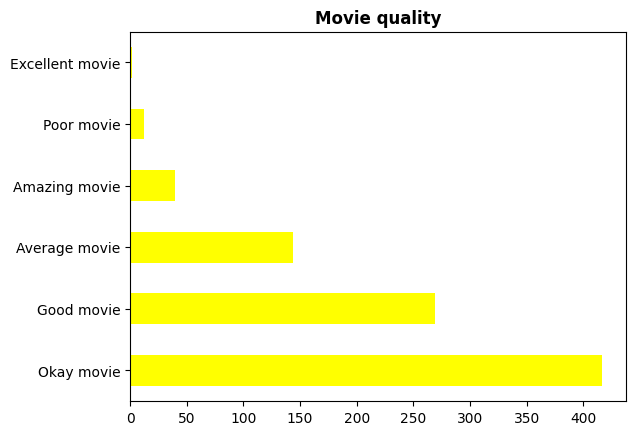

In [32]:
# Displaying the movie rating classification based on the algorithm above:
df['Quality'].value_counts().plot(kind = 'barh', color = 'yellow')
plt.ylabel(None)
plt.title('Movie quality', fontweight = 'bold')
plt.show()

In [33]:
# Classifying the movies by popularity based on how many people rated them:
def movie_popularity(num_votes):
  if num_votes >= 2000000:
    popularity = 'Incredibly popular movie'
  elif num_votes >= 1000000 and num_votes < 2000000:
    popularity = 'Amazingly popular movie'
  elif num_votes >= 750000 and num_votes < 1000000:
    popularity = 'Very popular movie'
  elif num_votes >= 500000 and num_votes < 750000:
    popularity = 'Popular movie'
  elif num_votes >= 250000 and num_votes < 500000:
    popularity = 'Not so popular movie'
  elif num_votes >= 100000 and num_votes < 250000:
    popularity = 'Almost unknown movie'
  elif num_votes >= 10000 and num_votes < 100000:
    popularity = 'Unknown movie'
  else:
    popularity = 'Few people know this movie'
  return popularity

# Applying the function above on a column of the dataset and generating a new column as result:
df['Movie popularity'] = df['Num Votes'].apply(movie_popularity)
df.head(10)

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Day Created,Month Created,Year Created,Quality,Movie popularity
0,2020-07-11,Metropolis,movie,8.3,153,1927,"Drama, Sci-Fi",183084,1927-01-10,Fritz Lang,11,7,2020,Amazing movie,Almost unknown movie
1,2020-07-11,Frankenstein,movie,7.8,70,1931,"Drama, Horror, Sci-Fi, Thriller",78679,1931-11-19,James Whale,11,7,2020,Good movie,Unknown movie
2,2021-11-07,Snow White and the Seven Dwarfs,movie,7.6,83,1937,"Animation, Adventure, Family, Fantasy, Musical...",212860,1937-12-21,"William Cottrell, David Hand, Perce Pearce, Be...",7,11,2021,Good movie,Almost unknown movie
3,2021-09-25,Stagecoach,movie,7.8,96,1939,"Adventure, Drama, Western",52939,1939-02-10,John Ford,25,9,2021,Good movie,Unknown movie
4,2022-04-08,Gone with the Wind,movie,8.2,238,1939,"Drama, Romance, War",330391,1939-12-15,"Sam Wood, George Cukor, Victor Fleming",8,4,2022,Amazing movie,Not so popular movie
5,2020-04-29,The Great Dictator,movie,8.4,125,1940,"Comedy, Drama, War",234759,1940-10-15,Charles Chaplin,29,4,2020,Amazing movie,Almost unknown movie
6,2021-07-16,The Picture of Dorian Gray,movie,7.5,110,1945,"Drama, Fantasy, Horror, Mystery, Romance, Thri...",14229,1945-03-01,Albert Lewin,16,7,2021,Good movie,Unknown movie
7,2023-05-31,Spellbound,movie,7.5,111,1945,"Film-Noir, Mystery, Romance, Thriller",51485,1945-10-31,Alfred Hitchcock,31,5,2023,Good movie,Unknown movie
8,2022-06-12,SciusciÃ,movie,8.0,87,1946,Drama,8014,1946-04-27,Vittorio De Sica,12,6,2022,Amazing movie,Few people know this movie
9,2021-05-21,The Postman Always Rings Twice,movie,7.4,113,1946,"Crime, Drama, Film-Noir, Mystery, Romance, Thr...",22559,1946-04-30,Tay Garnett,21,5,2021,Good movie,Unknown movie


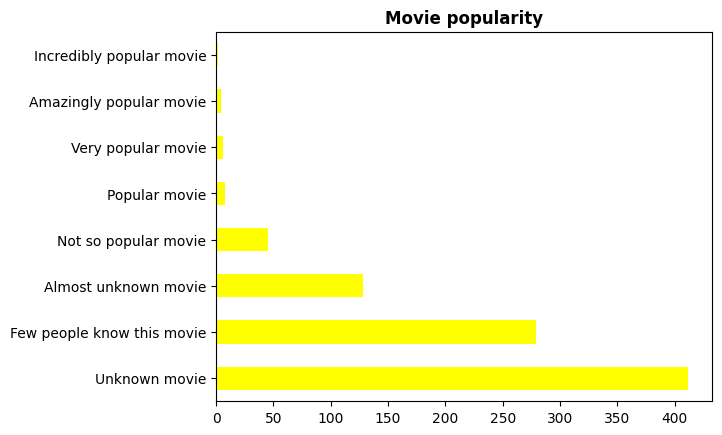

In [34]:
# Displaying the movie popularity based on the algorithm above:
df['Movie popularity'].value_counts().plot(kind = 'barh', color = 'yellow')
plt.ylabel(None)
plt.title('Movie popularity', fontweight = 'bold')
plt.show()

In [36]:
# Classifying the movies by duration based on their runtime:
def movie_duration(runtime):
  if runtime >= 180:
    duration = 'Really long movie'
  elif runtime >= 150 and runtime < 180:
    duration = 'Very long movie'
  elif runtime >= 120 and runtime < 150:
    duration = 'Long movie'
  elif runtime >= 100 and runtime < 120:
    duration = 'Average length movie'
  elif runtime >= 90 and runtime < 100:
    duration = 'Quick movie'
  elif runtime >= 70 and runtime < 90:
    duration = 'Short movie'
  else:
    duration = 'Is that a movie or an episode?'
  return duration

# Applying the function above on a column of the dataset and generating a new column as result:
df['Movie duration'] = df['Runtime (mins)'].apply(movie_duration)
df.head(10)

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Day Created,Month Created,Year Created,Quality,Movie popularity,Movie duration
0,2020-07-11,Metropolis,movie,8.3,153,1927,"Drama, Sci-Fi",183084,1927-01-10,Fritz Lang,11,7,2020,Amazing movie,Almost unknown movie,Very long movie
1,2020-07-11,Frankenstein,movie,7.8,70,1931,"Drama, Horror, Sci-Fi, Thriller",78679,1931-11-19,James Whale,11,7,2020,Good movie,Unknown movie,Short movie
2,2021-11-07,Snow White and the Seven Dwarfs,movie,7.6,83,1937,"Animation, Adventure, Family, Fantasy, Musical...",212860,1937-12-21,"William Cottrell, David Hand, Perce Pearce, Be...",7,11,2021,Good movie,Almost unknown movie,Short movie
3,2021-09-25,Stagecoach,movie,7.8,96,1939,"Adventure, Drama, Western",52939,1939-02-10,John Ford,25,9,2021,Good movie,Unknown movie,Quick movie
4,2022-04-08,Gone with the Wind,movie,8.2,238,1939,"Drama, Romance, War",330391,1939-12-15,"Sam Wood, George Cukor, Victor Fleming",8,4,2022,Amazing movie,Not so popular movie,Really long movie
5,2020-04-29,The Great Dictator,movie,8.4,125,1940,"Comedy, Drama, War",234759,1940-10-15,Charles Chaplin,29,4,2020,Amazing movie,Almost unknown movie,Long movie
6,2021-07-16,The Picture of Dorian Gray,movie,7.5,110,1945,"Drama, Fantasy, Horror, Mystery, Romance, Thri...",14229,1945-03-01,Albert Lewin,16,7,2021,Good movie,Unknown movie,Average length movie
7,2023-05-31,Spellbound,movie,7.5,111,1945,"Film-Noir, Mystery, Romance, Thriller",51485,1945-10-31,Alfred Hitchcock,31,5,2023,Good movie,Unknown movie,Average length movie
8,2022-06-12,SciusciÃ,movie,8.0,87,1946,Drama,8014,1946-04-27,Vittorio De Sica,12,6,2022,Amazing movie,Few people know this movie,Short movie
9,2021-05-21,The Postman Always Rings Twice,movie,7.4,113,1946,"Crime, Drama, Film-Noir, Mystery, Romance, Thr...",22559,1946-04-30,Tay Garnett,21,5,2021,Good movie,Unknown movie,Average length movie


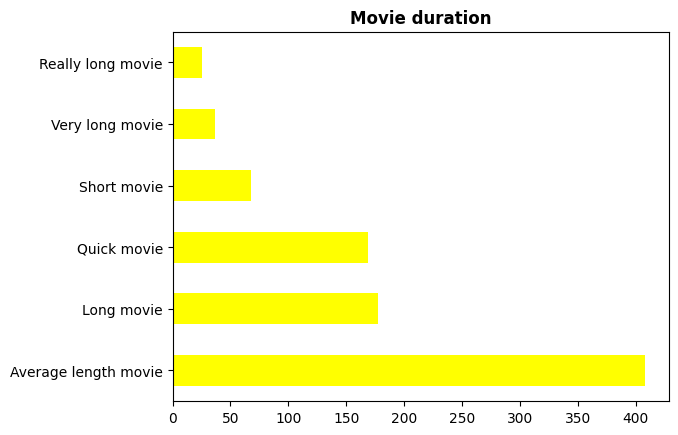

In [38]:
# Displaying the movie duration based on the algorithm above:
df['Movie duration'].value_counts().plot(kind = 'barh', color = 'yellow')
plt.ylabel(None)
plt.title('Movie duration', fontweight = 'bold')
plt.show()

In [42]:
# Checking how many rows contain the word 'Drama' in Genres column:
action =  df['Genres'].str.contains('Action').value_counts()
comedy =  df['Genres'].str.contains('Comedy').value_counts()
crime =  df['Genres'].str.contains('Crime').value_counts()
drama = df['Genres'].str.contains('Drama').value_counts()
fantasy =  df['Genres'].str.contains('Fantasy').value_counts()
film_noir =  df['Genres'].str.contains('Film-Noir').value_counts()
horror =  df['Genres'].str.contains('Horror').value_counts()
mystery =  df['Genres'].str.contains('Mystery').value_counts()
musical =  df['Genres'].str.contains('Musical').value_counts()
romance =  df['Genres'].str.contains('Romance').value_counts()
scifi =  df['Genres'].str.contains('Sci-Fi').value_counts()
thriller =  df['Genres'].str.contains('Thriller').value_counts()
war =  df['Genres'].str.contains('War').value_counts()
western =  df['Genres'].str.contains('Western').value_counts()

print (action)
print (comedy)
print (crime)
print (drama)
print (fantasy)
print (film_noir)
print (horror)

False    739
True     145
Name: Genres, dtype: int64
False    569
True     315
Name: Genres, dtype: int64
False    713
True     171
Name: Genres, dtype: int64
True     610
False    274
Name: Genres, dtype: int64
False    817
True      67
Name: Genres, dtype: int64
False    879
True       5
Name: Genres, dtype: int64
False    851
True      33
Name: Genres, dtype: int64
